In [11]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
def connect():
  connection = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "wp-ecommerce"
  )

  cursor = connection.cursor(dictionary = True)

  return connection, cursor

In [3]:
def get_sales_by_category():
  _, cursor = connect()

  sql = '''
    SELECT wp_term_taxonomy.term_id, wp_terms.name, sum(wp_wc_order_product_lookup.product_qty) as sales
    FROM wp_wc_order_product_lookup
    INNER JOIN wp_term_relationships ON wp_term_relationships.object_id = wp_wc_order_product_lookup.product_id
    INNER JOIN wp_term_taxonomy ON wp_term_taxonomy.term_taxonomy_id = wp_term_relationships.term_taxonomy_id
    INNER JOIN wp_terms ON wp_terms.term_id = wp_term_taxonomy.term_id
    WHERE wp_term_taxonomy.taxonomy = 'product_cat'
    GROUP BY wp_term_taxonomy.term_id
  '''

  cursor.execute(sql)

  results = cursor.fetchall()

  entries = []

  for row in results:
    entries.append({
      "category_id": row["term_id"],
      "category": row["name"],
      "sales": row["sales"]
    })
  
  data = pd.DataFrame(entries)

  return data

In [4]:
data = get_sales_by_category()

data

,category_id,category,sales
0,74,ملابس رجالي,2044
1,75,ملابس نسائي,2248
2,76,أحذية رجالي,1283
3,77,أحذية نسائي,758
4,78,إلكترونيات,1392
5,79,مستحضرات تجميل,905
6,82,إكسسوارات,506


In [7]:
def show_sales_by_category_bars():
  data["category"] = data["category"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

  x = data["category"]
  y = data["sales"]

  plt.figure(figsize = (10, 6))
  plt.title("Sales by Categories")
  plt.xlabel("Category")
  plt.ylabel("Total Sales")

  colors = []

  for i in range(len(x)):
    colors.append([np.random.rand(), np.random.rand(), np.random.rand()])
    plt.text(x = i, y = y[i], s = y[i])

  plt.bar(x, y, color = colors)
  plt.show()

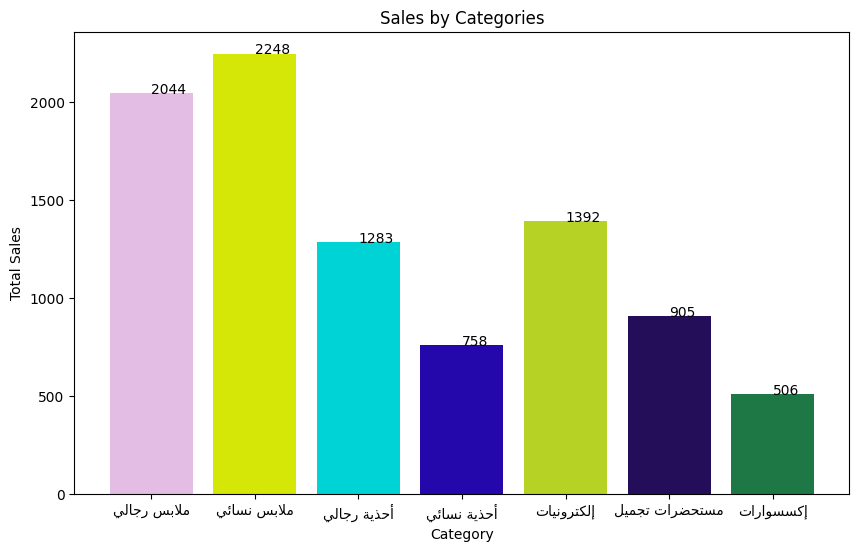

In [8]:
show_sales_by_category_bars()

In [9]:
def show_sales_by_category_pie():
  sales = data["sales"]
  labels = data["category"]

  plt.figure(figsize = (10, 6))
  plt.title("Sales by category")
  plt.pie(sales, labels = labels, autopct = "%1.1f%%")
  plt.show()

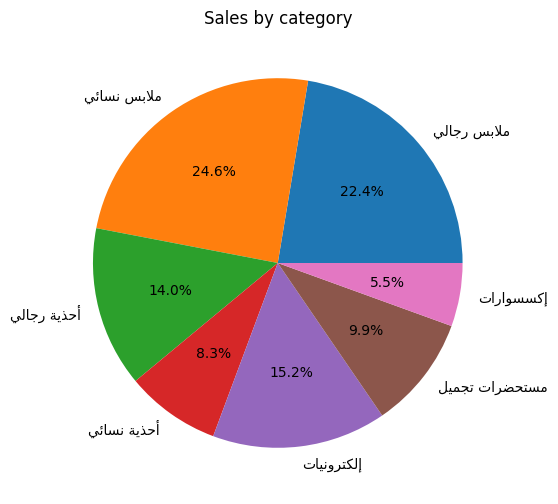

In [10]:
show_sales_by_category_pie()